In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DATA

In [3]:
admission_df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [4]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
admission_df.drop(['Serial No.'], axis=1,inplace =True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [7]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df2=admission_df.groupby('University Rating').mean()

In [9]:
df2

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# Data Visualization

In [10]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

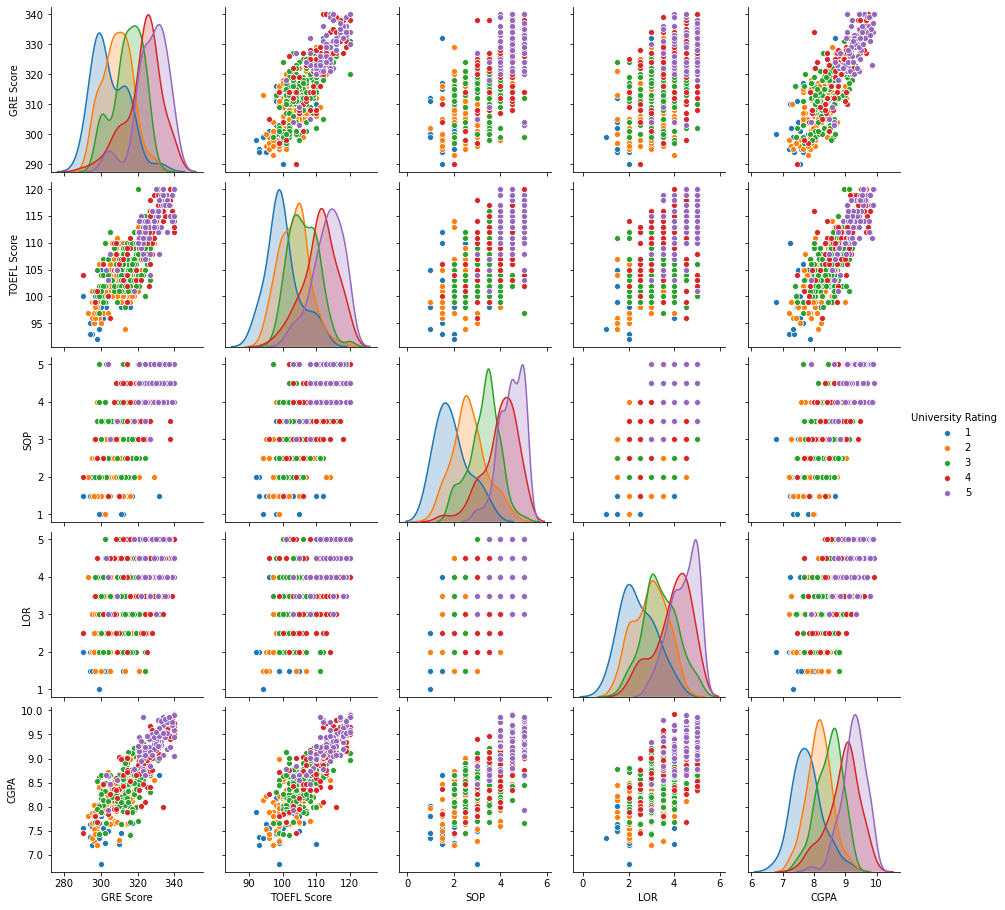

In [11]:
sns.pairplot(admission_df,vars=['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA',
       ],hue='University Rating')

<AxesSubplot:>

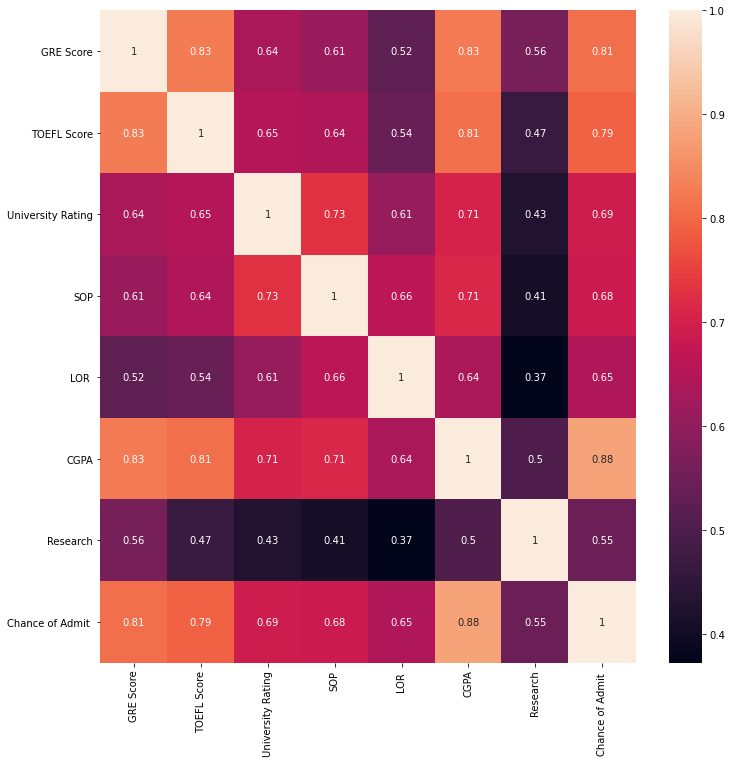

In [12]:
corr_matrix =admission_df.corr()
plt.figure(figsize =(12,12))
sns.heatmap(corr_matrix,annot= True)

In [13]:
x = admission_df.drop(columns = ['Chance of Admit '])


In [14]:
y= admission_df['Chance of Admit ']

In [15]:
x.shape

(500, 7)

In [16]:
y.shape

(500,)

In [17]:
x=np.array(x)
y= np.array(y)
y=y.reshape(-1,1)
y.shape

(500, 1)

In [18]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaled_x = StandardScaler()
x_s = scaled_x.fit_transform(x)
scaled_y = StandardScaler()
y_s = scaled_y.fit_transform(y)

# Linear Regression model

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split (x_s,y_s,test_size= 0.15)

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Accuracy

In [21]:
accuracy= model.score(x_val,y_val)
accuracy

0.8622484825516331

# Desicision tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model .fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
dt_model.score(x_val,y_val)

0.5198304797956943

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=20,max_depth=15)
rf_model.fit(x_train,y_train)

<ipython-input-24-f9431a16c48e>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,y_train)


RandomForestRegressor(max_depth=15, n_estimators=20)

In [25]:
rf_model.score(x_val,y_val)

0.8087478024632039

# KPIs

In [26]:
#linear regression
y_predict= model.predict(x_val)

Text(0, 0.5, 'predicted')

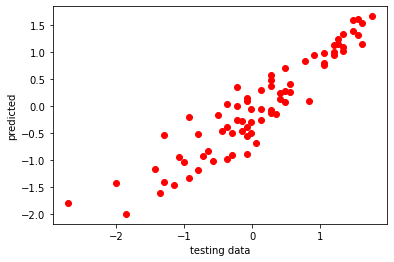

In [27]:
plt.plot(y_val,y_predict,'o',color='red')
plt.xlabel("testing data")
plt.ylabel("predicted")

In [28]:
y_pred_orignal = scaled_y.inverse_transform(y_predict)
y_test_orignal = scaled_y.inverse_transform(y_val)

Text(0, 0.5, 'predicted')

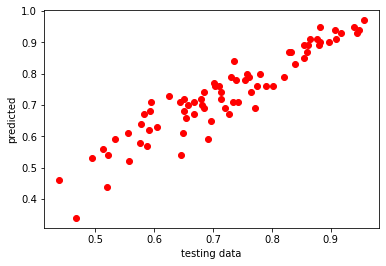

In [29]:
plt.plot(y_pred_orignal,y_test_orignal,'o',color='red')
plt.xlabel("testing data")
plt.ylabel("predicted")

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

In [32]:
MSE = mean_squared_error(y_test_orignal,y_pred_orignal)
r2 = r2_score(y_test_orignal,y_pred_orignal)

In [33]:
print( "Mean  squared error: ",MSE)
print( "R2 score: ",r2)

Mean  squared error:  0.002489362160187451
R2 score:  0.8622484825516331
